<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data-science2/blob/main/Word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converting the words into vectors is one of the task in nlp. There are methods like one hot encoding but for large number of words they uses more computation speed and generally dont capture the relationship between two words . So we use .
## word embeddings ##
In word embeddings we compare the similarity between the feature vector of the words .

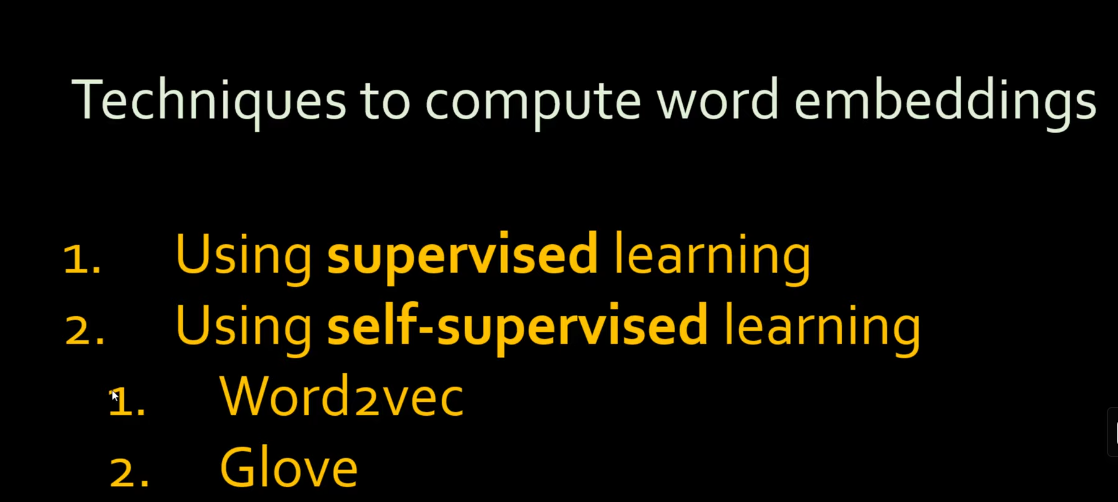

Let us say you got 50, 000 words then you represent those words in the form like matrices as shown below :

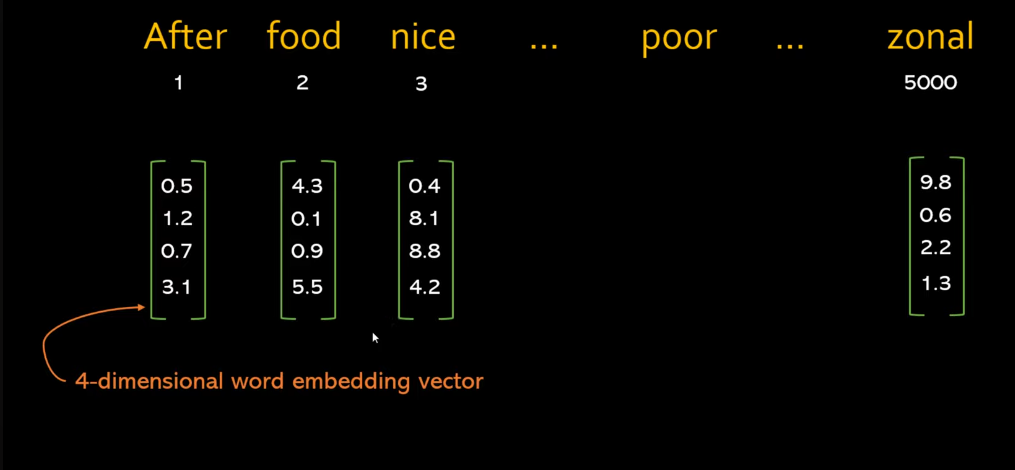

**Our goal is to achieve like this matrix**

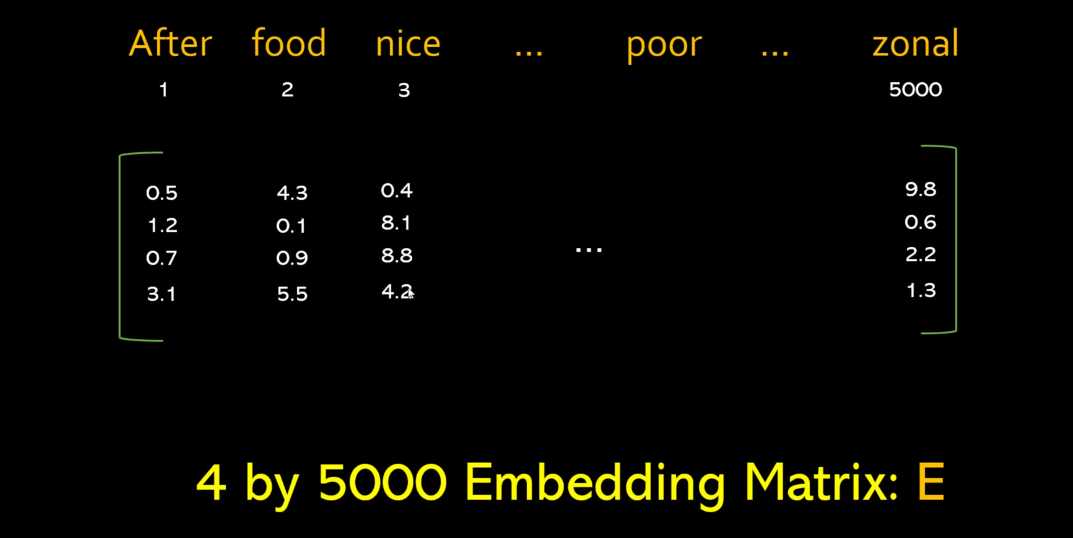

As first step you calculate the one hot embeddings.
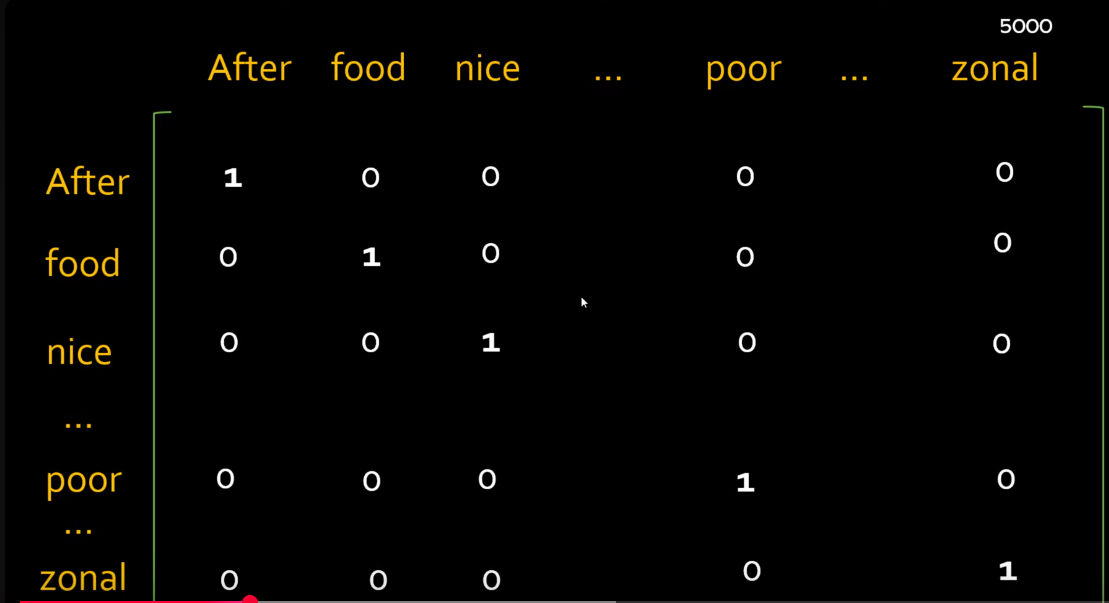

Here we have two words with each randomly initilized weights now we get the matrix for requred words.

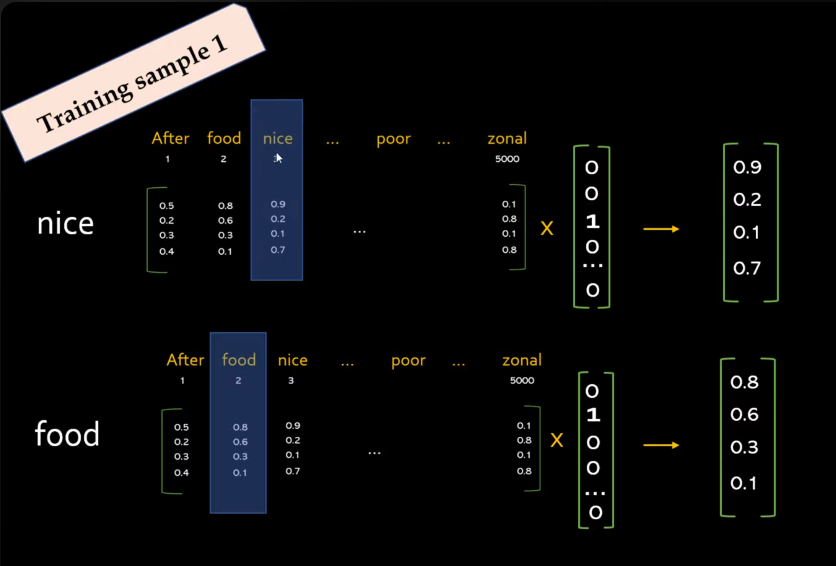

After flattenning and training the weights gets updated as shown below:
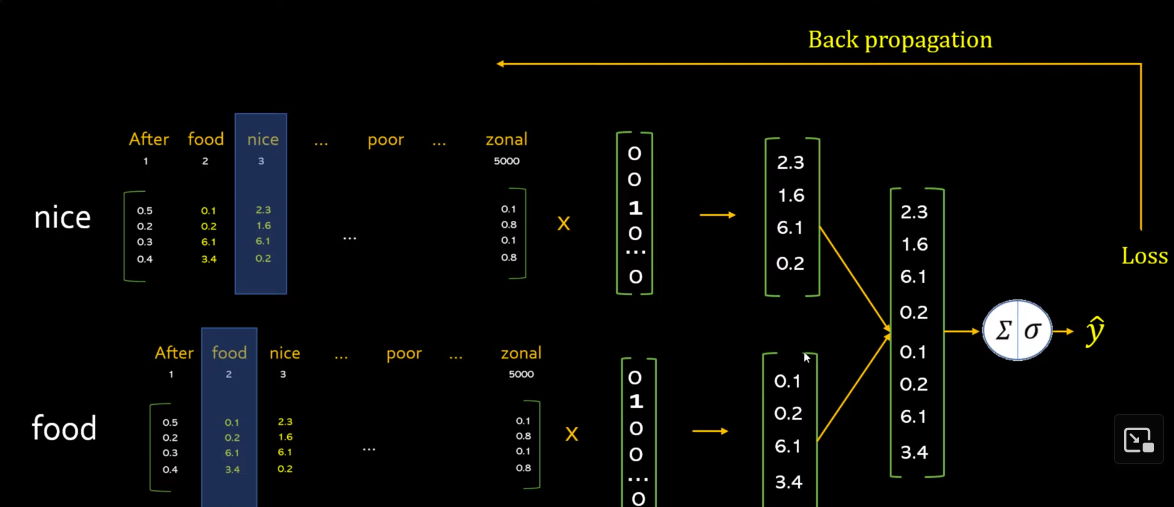

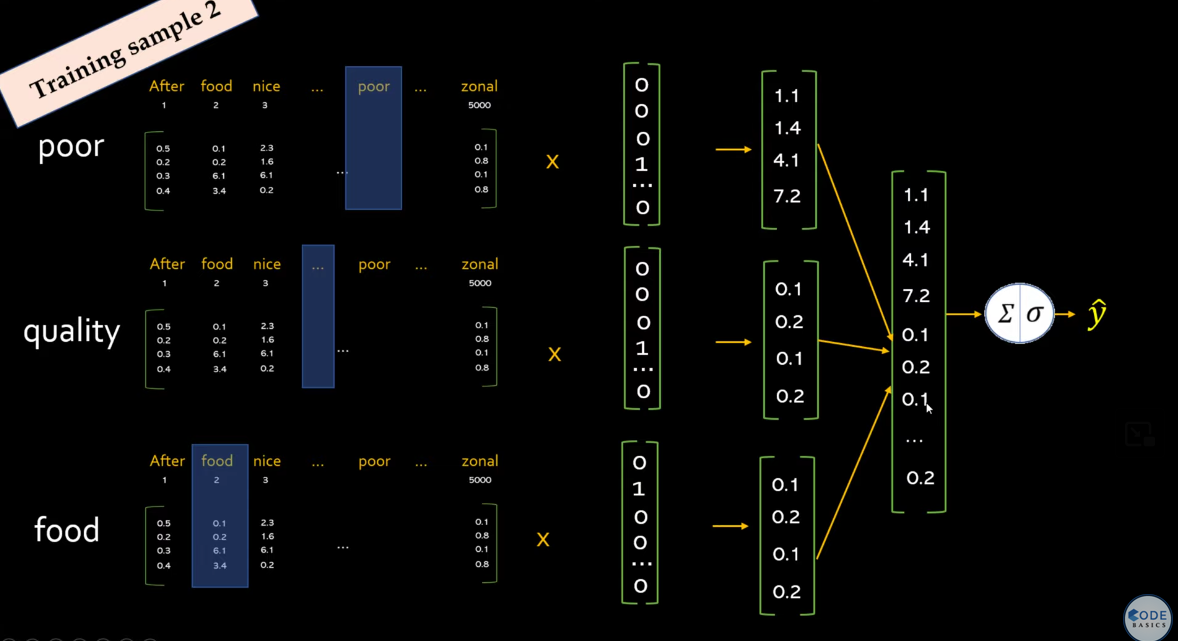

Lets say above is you new training sample . But there arises a question , for first sample there were only two words and for the next sample there are 3 words so what to do next ? Ok , the soulution is using padding .
Below  is the example:
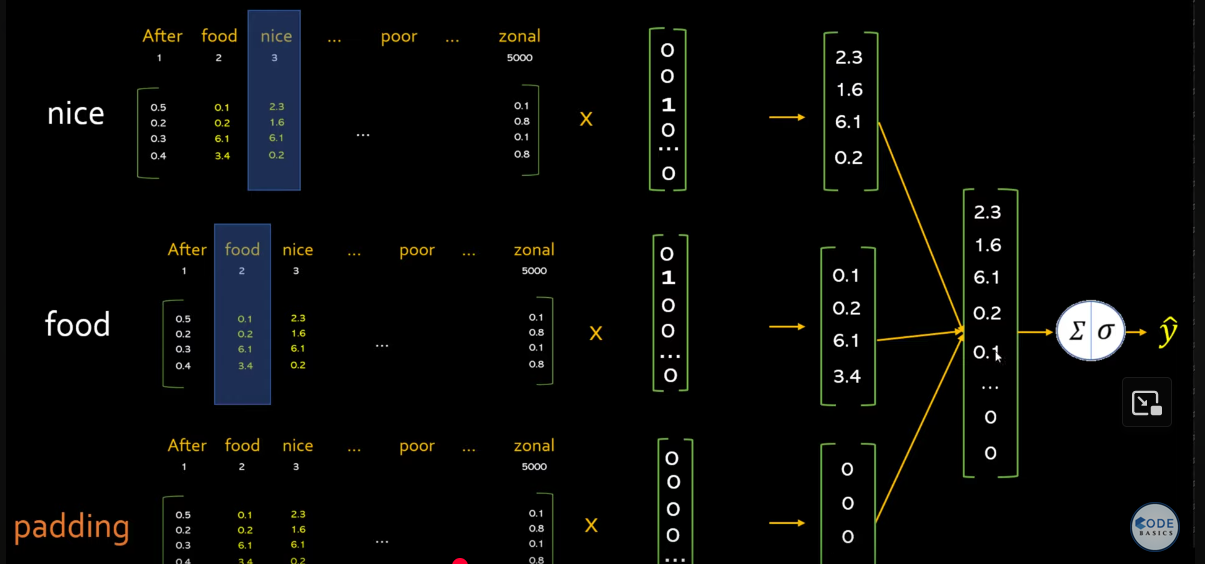

Finally you will get the embedding matrix as i discussed earlier ! i.e E and now you can see that nice and good have similar matrices.
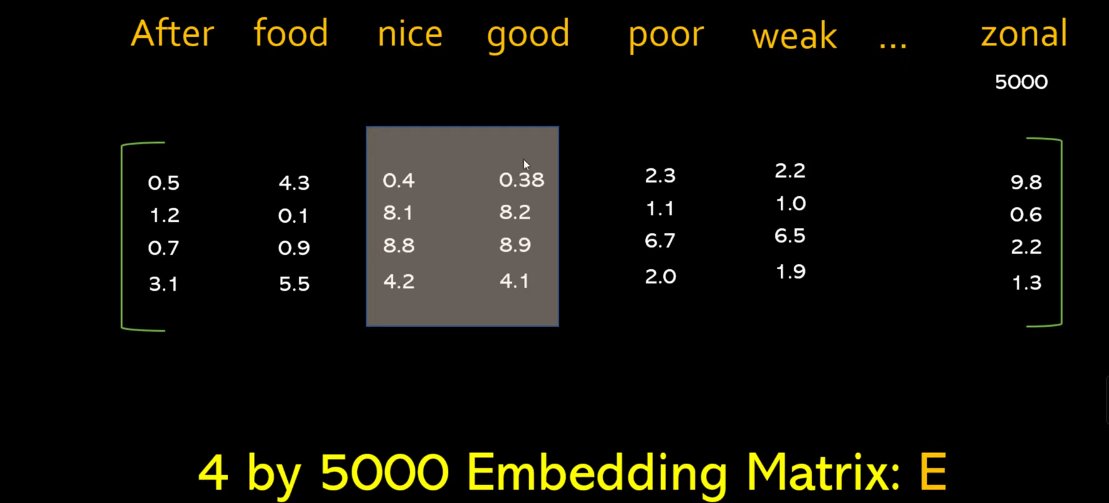

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [3]:
reviews=['nice food','amazing restaurant','too good','just loved it!','will go again','horrible food','never go there','poor service','poor quality','needs improvement']
sentiment=np.array([1,1,1,1,1,0,0,0,0,0])

In [4]:
one_hot("amazing restaurant",30) # it gives number from 1 to 30 for amazing 12 and restaurant 14

[19, 3]

In [5]:
vocab_size=30
encoded_reviews=[one_hot(review,vocab_size) for review in reviews]
encoded_reviews

[[2, 19],
 [19, 3],
 [24, 19],
 [27, 20, 4],
 [24, 13, 29],
 [20, 19],
 [6, 13, 12],
 [6, 26],
 [6, 24],
 [6, 18]]

now you need to do padding as the length of each reviews are not same !

In [6]:
max_length=4 # we are assuming one size larger
padded_reviews=pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
padded_reviews


array([[ 2, 19,  0,  0],
       [19,  3,  0,  0],
       [24, 19,  0,  0],
       [27, 20,  4,  0],
       [24, 13, 29,  0],
       [20, 19,  0,  0],
       [ 6, 13, 12,  0],
       [ 6, 26,  0,  0],
       [ 6, 24,  0,  0],
       [ 6, 18,  0,  0]], dtype=int32)

In [7]:
 # NOw creating embedding vector size and performing
embedded_vector_size=4
model=Sequential()
model.add(Embedding(vocab_size,embedded_vector_size,input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
X=padded_reviews
y=sentiment

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X,y,epochs=50,verbose=0)

In [11]:
loss,accuracy=model.evaluate(X,y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 1.0000 - loss: 0.6103


1.0

In [14]:
weights=model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [15]:
weights[2]

array([ 0.07823811, -0.09336001, -0.03271363,  0.06655931], dtype=float32)

In [17]:
weights[19]

array([0.01185214, 0.02676847, 0.02463122, 0.08480313], dtype=float32)

above are the emebedded vectors for nice and amazing . since the training sample is small so the nice and amazing may not have very similar embedding vectors.